# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [743]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [744]:
#ваш код 
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\MATH&ML-6. Математический анализ в контексте задачи оптимизации. Часть III/Advertising.zip')
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [745]:
#ваш код 
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [746]:
#ваш код = ПРОПУСКОВ НЕТ

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [747]:
#ваш код 
# признак unnamed:0 игнорируем, он дублирует индексы со сдвигом на 1

X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [748]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])# добавляем в матрицу наблюдений единичный столбец
y = y.reshape(-1, 1)# преобразуем вектор y в массив
print(X.shape, y.shape)# проверим размерность данных

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [749]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [750]:
# ваш код
# задаем функцию для решения задания
def coordinate_descent(X,y, w, num_iters = 1000):
    mse = []
    mae = []
    for i in range(num_iters):
        for k in range(m):
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])     # Вычисляем прогноз
            w[k] =  (X[:,k].T @ (y - h))                        # Обновляем k-й коэффициент
            mse = sum((y - (X @ w)) ** 2)/(len(y))              # Вычисляем MSE
            mae = sum(abs(y - (X @ w)))/(len(y))                # Вычисляем MAE
    return w, mse, mae

m = X.shape[1]
n = len(y)
w = np.zeros((4,1))

w, mse, mae = coordinate_descent(X,y, w)

print(f'Коэффициенты линейной регрессии: \n {w}')
print(f'MSE: {mse}')
print(f'MAE: {mae}') 

Коэффициенты линейной регрессии: 
 [[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]
MSE: [2.78412631]
MAE: [1.25201123]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [751]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

Коэффициенты и метрики в обоих случаях совпадают

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [752]:
#ваш код
# вернём Х к исходному виду
X = np.array(df[['TV', 'radio', 'newspaper']])

# зарание вычислим стандартные отклонения столбцов для удобства
std = np.array([df['TV'].std(), df['radio'].std(), df['newspaper'].std()])

# масштабируем
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean())/std[i]

**Добавим единичный столбец**

In [753]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [754]:
#ваш код
def mse_error(y, y_hat):
    return np.sum((y-y_hat)**2)/m
    # m = len(y) = X.shape[0]

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [755]:
#ваш код
mean_value = np.ones(m) * y.mean()

print(mse_error(y, mean_value))

5417.14875


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [756]:
#ваш код
def lin_pred(predictor, weights):
    return predictor @ weights

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [757]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    dx = (2 * X[train_ind,:] * (lin_pred(X[train_ind,:], w) - y[train_ind]))/m  # шаг 1
    return w - dx * eta   # шаг 2

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [758]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, end_point):
    dist = 10000
    error_list = []
    i = 0
    np.random.seed(42)
    
    while i < max_iter:
        if dist < end_point: 
            return w, np.array(error_list)
        index = np.random.randint(1,m)
        w = stoch_grad_step(X, y, w, index, eta)
        dist = np.linalg.norm(w)
        error_list.append(mse_error(y, lin_pred(X, w)))
        i += 1
    
    return w, np.array(error_list)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [759]:
# ваш код
vect_w, error_list = stochastic_gradient_descent(X, y, np.zeros(4), 0.01, 100000, 0.001)

In [760]:
import seaborn as sns 
import matplotlib.pyplot as plt

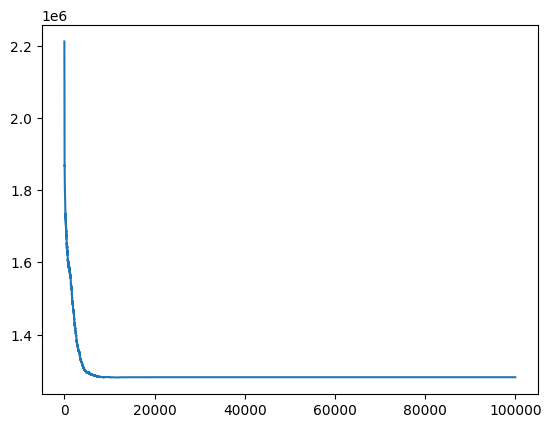

In [761]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.lineplot(x=range(len(error_list)), y=error_list) 
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [762]:
# ваш код
vect_w

array([11.79192686,  6.70041053,  7.37048269, -2.0211569 ])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [765]:
# ваш код
error_list

array([2211667.70186932, 2197944.36963124, 2174383.87383364, ...,
       1282116.89253023, 1282116.89253023, 1282116.89253023])